# Early Data Analysis Notebook

### Imports and loading data

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import random
import os

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
#train_filename = Path("../data/cases_train.csv").resolve()
#location_filename = '~\..\cmpt459project\data\location.csv'

train_filename = "../data/cases_train.csv"
location_filename = "../data/location.csv"
test_filename = "../data/cases_test.csv"


train_data = pd.read_csv(train_filename)
location_data = pd.read_csv(location_filename, delimiter=',')
test_data = pd.read_csv(test_filename)

#o = os.getcwd()
#train_data = pd.read_csv(o + "\\..\\data\\cases_train.csv", parse_dates = True)
# data = pd.read_csv(o + "\\..\\results\\cases_train_processed.csv", parse_dates = True)
#test_data = pd.read_csv(o + "\\..\\data\\cases_test.csv", parse_dates = True)
# location= pd.read_csv(o + "\\..\\data\\location.csv", parse_dates = True)

#For Mac/Linux
'''
train_data = pd.read_csv(o + "/../data/cases_train.csv", parse_dates = True)
# data = pd.read_csv(o + "/../results/cases_train_processed.csv", parse_dates = True)
test_data = pd.read_csv(o + "/../data/cases_test.csv", parse_dates = True)
# location= pd.read_csv(o + "/../data/location.csv", parse_dates = True)
'''

'\ntrain_data = pd.read_csv(o + "/../data/cases_train.csv", parse_dates = True)\n# data = pd.read_csv(o + "/../results/cases_train_processed.csv", parse_dates = True)\ntest_data = pd.read_csv(o + "/../data/cases_test.csv", parse_dates = True)\n# location= pd.read_csv(o + "/../data/location.csv", parse_dates = True)\n'

## View of original data

In [3]:
train_data

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
3,15-34,female,Baden-Wurttemberg,Germany,48.120860,7.849500,15.03.2020,NaN,NaN,nonhospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized
...,...,...,...,...,...,...,...,...,...,...
367631,15.0,male,Santa Fe,Argentina,-32.967800,-60.659240,31.03.2020,NaN,NaN,nonhospitalized
367632,NaN,NaN,Delhi,India,28.614740,77.209100,16.04.2020,NaN,https://twitter.com/ANI/status/125082767765900...,hospitalized
367633,NaN,NaN,Maharashtra,India,19.200000,72.966670,30.05.2020,NaN,https://arogya.maharashtra.gov.in/pdf/ncovidep...,hospitalized
367634,28,female,NaN,Singapore,1.280224,103.834500,03.02.2020,Case 19; worked at health product shop with ma...,https://www.moh.gov.sg/news-highlights/details...,recovered


In [4]:
test_data

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46495,22,female,Caaguazu,Paraguay,-25.468250,-56.01425,22.05.2020,NaN,NaN,NaN
46496,21,male,Lima,Peru,-12.043180,-77.02824,04.05.2020,NaN,NaN,NaN
46497,73,male,Karnataka,India,14.029390,74.97440,02.04.2020,"Travelled to Delhi,",https://twitter.com/ANI/status/124564120884981...,NaN
46498,33,female,Lima,Peru,-11.932980,-77.04085,22.04.2020,NaN,NaN,NaN


In [5]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


## Data Visualization

In [6]:
train_data['outcome'].value_counts()

nonhospitalized    150000
hospitalized       125000
recovered           88137
deceased             4499
Name: outcome, dtype: int64

**Plotting Outcome Labels Per Cases in Sample Population (Bar Graph)**

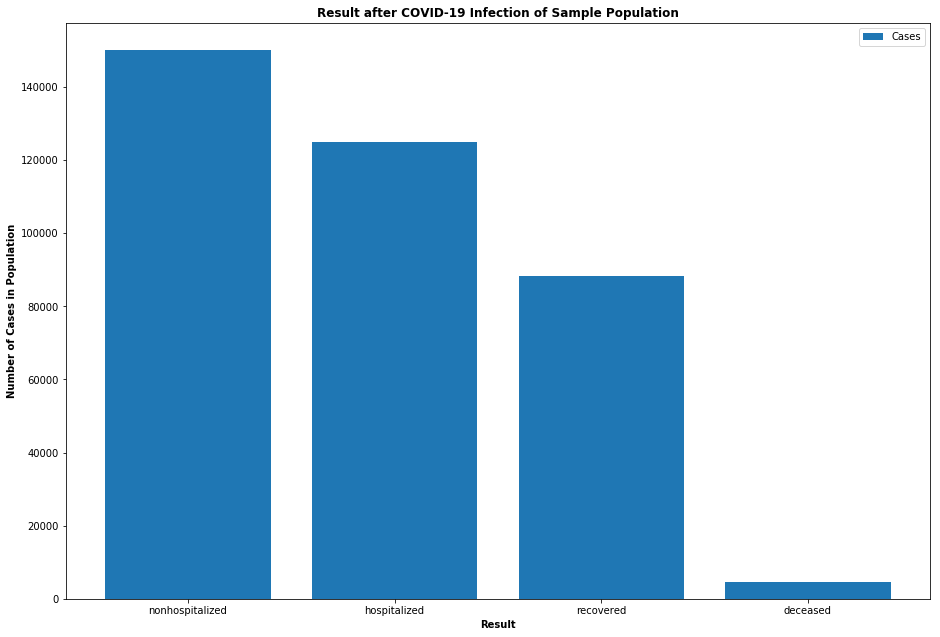

In [7]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data['outcome'].value_counts().keys(), train_data['outcome'].value_counts(),label='Cases')
plt.title('Result after COVID-19 Infection of Sample Population',fontweight='bold')
plt.xlabel('Result',fontweight='bold')
plt.ylabel('Number of Cases in Population',fontweight='bold')
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot1", bbox_inches="tight")

In [8]:
train_data['country'].value_counts()

India          212411
Peru            57305
Germany         33009
Philippines     11521
Colombia        11464
                ...  
Azerbaijan          1
Kosovo              1
Reunion             1
San Marino          1
Qatar               1
Name: country, Length: 131, dtype: int64

In [9]:
train_data2 = train_data

plt_values = train_data2['country'].value_counts()
to_remove = plt_values[plt_values <= 10000].index
train_data2 = train_data2[~train_data2.country.isin(to_remove)]

In [10]:
train_data2['country'].value_counts()

India          212411
Peru            57305
Germany         33009
Philippines     11521
Colombia        11464
Name: country, dtype: int64

**Plotting Top 5 Countries with the Most Covid-19 Cases (Bar Graph)**

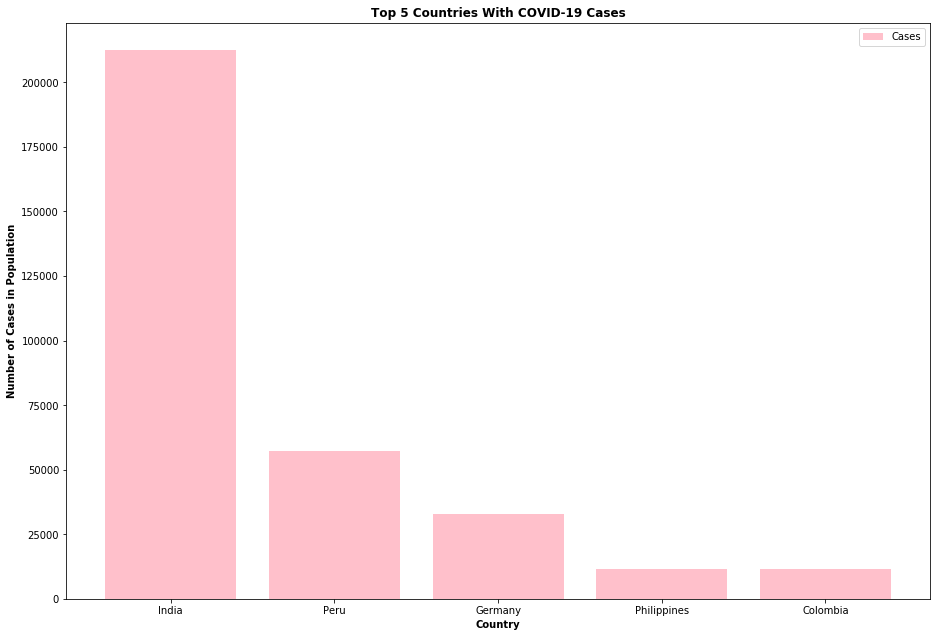

In [11]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data2['country'].value_counts().keys(), train_data2['country'].value_counts(),label='Cases',color='pink')
plt.title('Top 5 Countries With COVID-19 Cases',fontweight='bold')
plt.xlabel('Country',fontweight='bold')
plt.ylabel('Number of Cases in Population',fontweight='bold')
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot2", bbox_inches="tight")

In [12]:
train_data3 = train_data[train_data['country'] == 'India']

In [13]:
train_data3

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Delhi,India,28.614740,77.209100,26.05.2020,NaN,https://twitter.com/CMODelhi/status/1265203060...,recovered
1,NaN,NaN,Uttar Pradesh,India,25.436090,81.847180,20.05.2020,NaN,https://t.me/indiacovid/5222,hospitalized
2,NaN,NaN,Maharashtra,India,18.504220,73.853020,26.05.2020,NaN,https://t.me/indiacovid/5601,hospitalized
4,NaN,NaN,Gujarat,India,23.188409,73.647122,20.05.2020,NaN,https://twitter.com/PIBAhmedabad/status/126311...,hospitalized
5,NaN,NaN,Maharashtra,India,19.200000,72.966670,28.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,recovered
...,...,...,...,...,...,...,...,...,...,...
367628,NaN,NaN,Gujarat,India,23.027760,72.600270,25.04.2020,NaN,https://twitter.com/PIBAhmedabad/status/125405...,hospitalized
367629,NaN,NaN,West Bengal,India,25.010940,88.140530,24.05.2020,NaN,https://www.wbhealth.gov.in/uploaded_files/cor...,hospitalized
367630,NaN,NaN,Tamil Nadu,India,13.083620,80.282520,29.05.2020,NaN,https://stopcorona.tn.gov.in/wp-content/upload...,recovered
367632,NaN,NaN,Delhi,India,28.614740,77.209100,16.04.2020,NaN,https://twitter.com/ANI/status/125082767765900...,hospitalized


**Plotting Sample Population of India's Outcome Labels for Respective Covid-19 Cases (Bar Graph)**

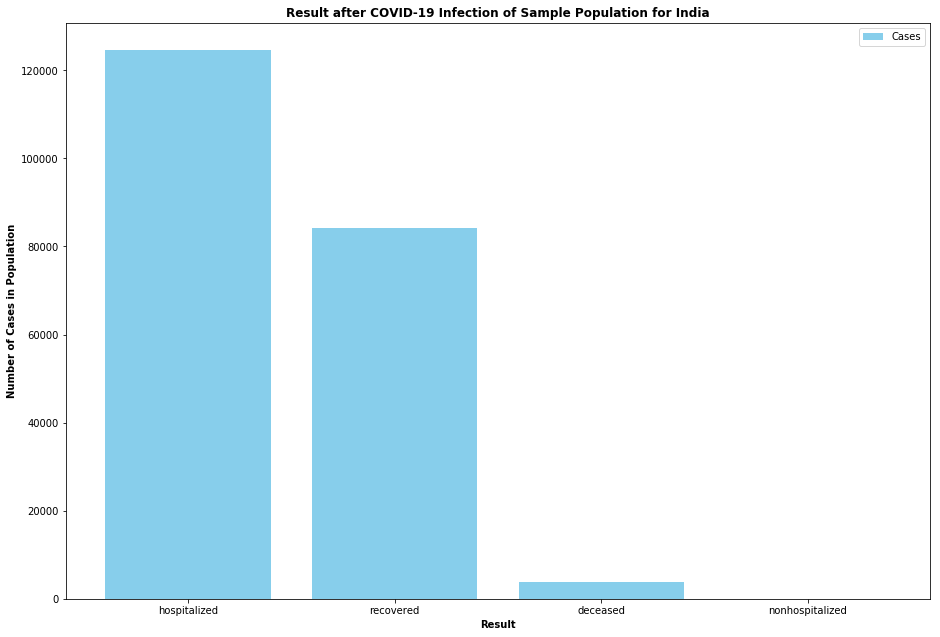

In [14]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data3['outcome'].value_counts().keys(), train_data3['outcome'].value_counts(),label='Cases',color='skyblue')
plt.title('Result after COVID-19 Infection of Sample Population for India',fontweight='bold')
plt.xlabel('Result',fontweight='bold')
plt.ylabel('Number of Cases in Population',fontweight='bold')
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot3", bbox_inches="tight")

In [15]:
train_data3['outcome'].value_counts()

hospitalized       124550
recovered           84091
deceased             3764
nonhospitalized         6
Name: outcome, dtype: int64

In [16]:
train_data4 = pd.DataFrame(train_data, columns=['sex', 'outcome'])

train_data5 = pd.DataFrame(train_data, columns=['sex', 'outcome'])

In [17]:
train_data['sex'].value_counts()

male      88635
female    71917
Name: sex, dtype: int64

In [18]:
train_data4

,sex,outcome
0,NaN,recovered
1,NaN,hospitalized
2,NaN,hospitalized
3,female,nonhospitalized
4,NaN,hospitalized
...,...,...
367631,male,nonhospitalized
367632,NaN,hospitalized
367633,NaN,hospitalized
367634,female,recovered


In [19]:
plt_values_m = train_data4['sex']
to_remove_f = plt_values_m[plt_values_m == 'female']
train_data4 = train_data4[~train_data4.sex.isin(to_remove_f)]

In [20]:
plt_values_f = train_data5['sex']
to_remove_m = plt_values_f[plt_values_f == 'male']
train_data5 = train_data5[~train_data5.sex.isin(to_remove_m)]

In [21]:
train_data4.dropna()

,sex,outcome
7,male,nonhospitalized
16,male,hospitalized
18,male,nonhospitalized
20,male,nonhospitalized
29,male,nonhospitalized
...,...,...
367603,male,nonhospitalized
367604,male,nonhospitalized
367618,male,hospitalized
367623,male,hospitalized


In [22]:
train_data5

,sex,outcome
0,NaN,recovered
1,NaN,hospitalized
2,NaN,hospitalized
3,female,nonhospitalized
4,NaN,hospitalized
...,...,...
367630,NaN,recovered
367632,NaN,hospitalized
367633,NaN,hospitalized
367634,female,recovered


In [23]:
train_data5.dropna()

,sex,outcome
3,female,nonhospitalized
10,female,nonhospitalized
25,female,nonhospitalized
30,female,nonhospitalized
31,female,nonhospitalized
...,...,...
367619,female,nonhospitalized
367626,female,nonhospitalized
367627,female,nonhospitalized
367634,female,recovered


In [24]:
train_data4['sex'].value_counts()

male    88635
Name: sex, dtype: int64

In [25]:
train_data5['sex'].dropna().value_counts()

female    71917
Name: sex, dtype: int64

**Plotting Covid-19 Cases of Sample Population By Gender (Stacked Bar Graph)**

*e.g. (12000 males and 11000 females but values appear stacked together per histogram bin)*

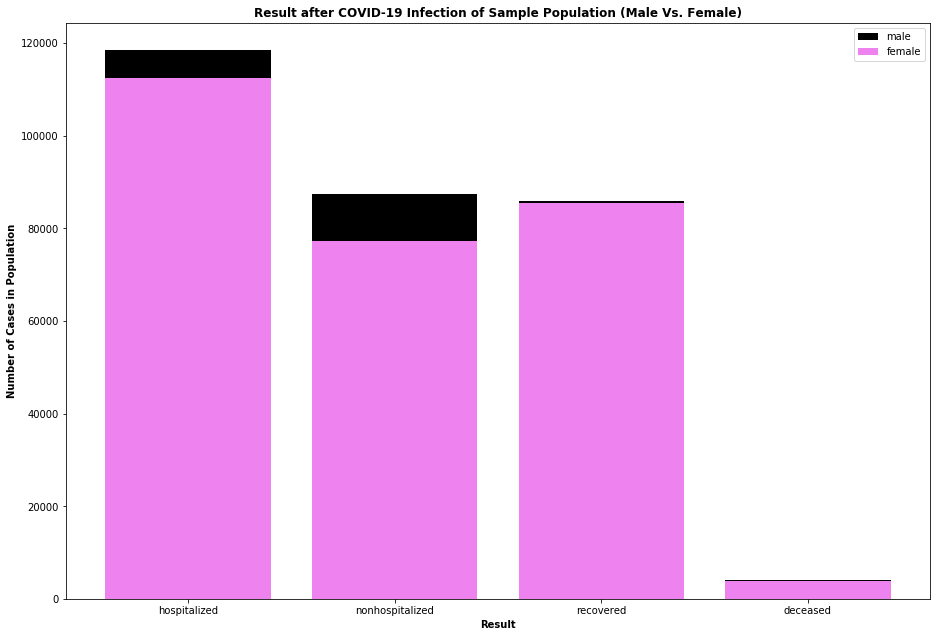

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data4['outcome'].value_counts().keys(), train_data4['outcome'].dropna().value_counts(),label='male',color='black')
ax.bar(train_data5['outcome'].value_counts().keys(), train_data5['outcome'].dropna().value_counts(),label='female',color='violet')
plt.title('Result after COVID-19 Infection of Sample Population (Male Vs. Female)',fontweight='bold')
plt.xlabel('Result',fontweight='bold')
plt.ylabel('Number of Cases in Population',fontweight='bold')
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot4", bbox_inches="tight")

In [27]:
train_data4['sex'].value_counts()

male    88635
Name: sex, dtype: int64

**Plotting Covid-19 Cases of Sample Population By Gender (Pie Graph)**

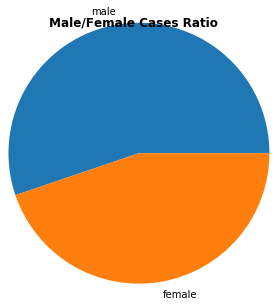

In [28]:
plt.pie(x=train_data['sex'].dropna().value_counts(),labels=['male','female'], radius=1.5)
plt.suptitle('Male/Female Cases Ratio',fontweight='bold')
plt.savefig("../plots/plot5", bbox_inches="tight")

In [29]:
train_data['age'].dropna().value_counts()

35-59    10785
15-34     8314
60-79     7271
80+       4383
31.0      1697
         ...  
13-65        1
20-69        1
15-88        1
50-60        1
30-40        1
Name: age, Length: 337, dtype: int64

In [30]:
train_data6 = pd.DataFrame(train_data, columns=['age', 'outcome'])

In [31]:
train_data6

,age,outcome
0,NaN,recovered
1,NaN,hospitalized
2,NaN,hospitalized
3,15-34,nonhospitalized
4,NaN,hospitalized
...,...,...
367631,15.0,nonhospitalized
367632,NaN,hospitalized
367633,NaN,hospitalized
367634,28,recovered


In [32]:
plt_values_a = train_data6['age'].value_counts()
to_remove_a = plt_values_a[plt_values_a <= 4382].index
train_data6 = train_data6[~train_data6.age.isin(to_remove_a)]

In [33]:
train_data6['age'].value_counts()

35-59    10785
15-34     8314
60-79     7271
80+       4383
Name: age, dtype: int64

In [34]:
train_data6.dropna()

,age,outcome
3,15-34,nonhospitalized
7,35-59,nonhospitalized
10,15-34,nonhospitalized
58,80+,nonhospitalized
84,15-34,nonhospitalized
...,...,...
367596,35-59,nonhospitalized
367603,15-34,nonhospitalized
367611,35-59,nonhospitalized
367617,35-59,nonhospitalized


**Plotting Frequency of Infection (by Age Group) (Bar Graph)**

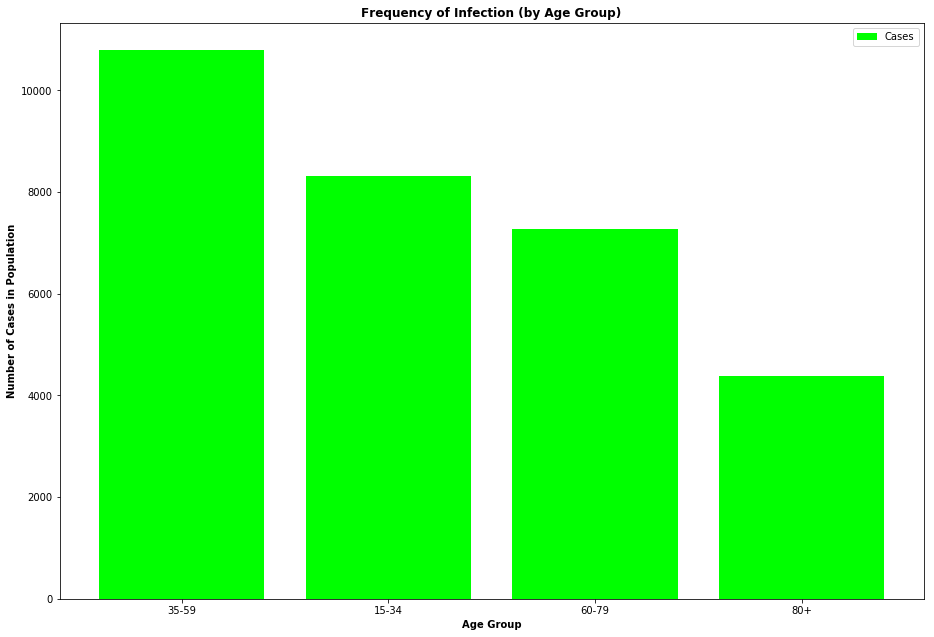

In [35]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(train_data6['age'].value_counts().keys(), train_data6['age'].dropna().value_counts(),label='Cases',color='lime')
plt.title('Frequency of Infection (by Age Group)',fontweight='bold')
plt.xlabel('Age Group',fontweight='bold')
plt.ylabel('Number of Cases in Population',fontweight='bold')
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot6", bbox_inches="tight")

In [36]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [37]:
location_data['Case-Fatality_Ratio'].value_counts()

0.000000    678
2.941176     10
1.515152     10
2.083333      8
1.265823      8
           ... 
0.931677      1
0.860295      1
6.115990      1
9.336100      1
0.313972      1
Name: Case-Fatality_Ratio, Length: 2624, dtype: int64

**Plotting Longitude vs. Latitude (Scatter Plot)** 

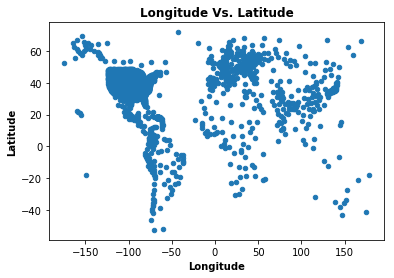

In [38]:
location_data.plot.scatter(x='Long_', y='Lat')
#plt.show()
plt.title('Longitude Vs. Latitude',fontweight='bold')
plt.xlabel('Longitude',fontweight='bold')
plt.ylabel('Latitude',fontweight='bold')
plt.savefig("../plots/plot7", bbox_inches="tight")

**Plotting Frequency of Longitude Coordinates (Histogram)**

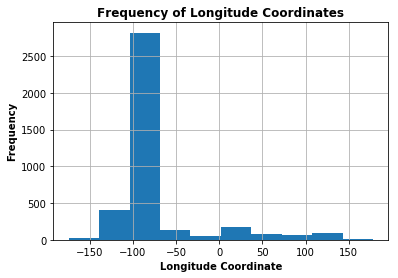

In [39]:
location_data.hist(column='Long_')
#plt.show()
plt.title('Frequency of Longitude Coordinates',fontweight='bold')
plt.xlabel('Longitude Coordinate',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.savefig("../plots/plot8", bbox_inches="tight")

In [40]:
location_data['Long_'].value_counts()

-72.331100     2
-70.812000     2
-71.572400     2
-73.653600     2
-76.826000     2
              ..
-85.660025     1
-100.401930    1
-88.929940     1
-89.329108     1
-53.000000     1
Name: Long_, Length: 3863, dtype: int64

**Plotting Frequency of Latitude Coordinates (Histogram)**

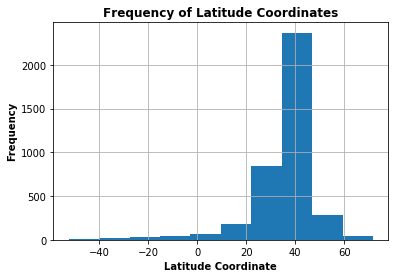

In [41]:
location_data.hist(column='Lat')
#plt.show()
plt.title('Frequency of Latitude Coordinates',fontweight='bold')
plt.xlabel('Latitude Coordinate',fontweight='bold')
plt.ylabel('Frequency',fontweight='bold')
plt.savefig("../plots/plot9", bbox_inches="tight")

In [42]:
location_data['Case-Fatality_Ratio'].mean()

2.355817632664575

In [43]:
location_data['Case-Fatality_Ratio'].std()

3.5385034408405285

In [44]:
test_data

,age,sex,province,country,latitude,longitude,date_confirmation,additional_information,source,outcome
0,NaN,NaN,Rajasthan,India,24.587000,73.69848,11.05.2020,NaN,https://t.me/indiacovid/4565,NaN
1,15-34,male,Bayern,Germany,49.993767,9.66288,09.04.2020,NaN,NaN,NaN
2,NaN,NaN,Maharashtra,India,19.200000,72.96667,23.05.2020,NaN,https://phdmah.maps.arcgis.com/apps/opsdashboa...,NaN
3,NaN,NaN,Madhya Pradesh,India,23.180870,75.78816,22.05.2020,NaN,https://twitter.com/JansamparkMP/status/126384...,NaN
4,56,female,Lima,Peru,-12.003950,-77.00695,19.04.2020,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46495,22,female,Caaguazu,Paraguay,-25.468250,-56.01425,22.05.2020,NaN,NaN,NaN
46496,21,male,Lima,Peru,-12.043180,-77.02824,04.05.2020,NaN,NaN,NaN
46497,73,male,Karnataka,India,14.029390,74.97440,02.04.2020,"Travelled to Delhi,",https://twitter.com/ANI/status/124564120884981...,NaN
46498,33,female,Lima,Peru,-11.932980,-77.04085,22.04.2020,NaN,NaN,NaN


In [45]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [46]:
lat_long_df = pd.DataFrame(location_data, columns=['Lat', 'Long_', 'Confirmed','Combined_Key','Active','Recovered','Deaths'])
lat_long_df.groupby('Lat').Long_.apply(pd.Series.tolist)

Lat
-52.368000        [-70.9863]
-51.796300        [-59.5236]
-45.986400        [-73.7669]
-42.882100        [147.3272]
-41.919800        [-72.1416]
                   ...      
 67.147163      [74.3415488]
 68.000042      [33.9999151]
 68.275572      [57.1686375]
 69.314792    [-153.4836093]
 71.706900        [-42.6043]
Name: Long_, Length: 3873, dtype: object

In [47]:
lat_long_df

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths
0,33.939110,67.709953,38919,Afghanistan,4906.0,32576,1437
1,41.153300,20.168300,12226,Albania,4980.0,6888,358
2,28.033900,1.659600,49623,Algeria,13035.0,34923,1665
3,42.506300,1.521800,1564,Andorra,347.0,1164,53
4,-11.202700,17.873900,3901,Angola,2309.0,1445,147
...,...,...,...,...,...,...,...
3949,31.952200,35.233200,35003,West Bank and Gaza,11304.0,23446,253
3950,24.215500,-12.885800,10,Western Sahara,1.0,8,1
3951,15.552727,48.516388,2026,Yemen,220.0,1221,585
3952,-13.133897,27.849332,14070,Zambia,375.0,13365,330


In [48]:
lat_long_df['Coordinate'] = lat_long_df[['Lat','Long_']].astype(str).apply(lambda x: ' '.join(x), axis=1)

In [49]:
lat_long_df

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
0,33.939110,67.709953,38919,Afghanistan,4906.0,32576,1437,33.93911 67.709953
1,41.153300,20.168300,12226,Albania,4980.0,6888,358,41.1533 20.1683
2,28.033900,1.659600,49623,Algeria,13035.0,34923,1665,28.0339 1.6596
3,42.506300,1.521800,1564,Andorra,347.0,1164,53,42.5063 1.5218
4,-11.202700,17.873900,3901,Angola,2309.0,1445,147,-11.2027 17.8739
...,...,...,...,...,...,...,...,...
3949,31.952200,35.233200,35003,West Bank and Gaza,11304.0,23446,253,31.9522 35.2332
3950,24.215500,-12.885800,10,Western Sahara,1.0,8,1,24.2155 -12.8858
3951,15.552727,48.516388,2026,Yemen,220.0,1221,585,15.552727 48.516388
3952,-13.133897,27.849332,14070,Zambia,375.0,13365,330,-13.133897 27.849332


In [50]:
lat_long_df['Coordinate']

0         33.93911 67.709953
1            41.1533 20.1683
2             28.0339 1.6596
3             42.5063 1.5218
4           -11.2027 17.8739
                ...         
3949         31.9522 35.2332
3950        24.2155 -12.8858
3951     15.552727 48.516388
3952    -13.133897 27.849332
3953    -19.015438 29.154857
Name: Coordinate, Length: 3954, dtype: object

In [51]:
lat_long_df['Confirmed'].sort_values(ascending=False)

253     1167496
54       931673
574      659656
6        622934
234      609558
         ...   
3071          0
2135          0
1756          0
2712          0
2982          0
Name: Confirmed, Length: 3954, dtype: int64

In [52]:
lat_long_df2 = lat_long_df

In [53]:
plt_values_c = lat_long_df2['Confirmed']
to_remove_c = plt_values_c[plt_values_c <= 609557]
lat_long_df2 = lat_long_df2[~lat_long_df2.Confirmed.isin(to_remove_c)]

In [54]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375


In [55]:
lat_long_df2 = lat_long_df2.sort_values(by=['Confirmed'],ascending=False)

In [56]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74


**Plotting Latitude-Longitude Coordinates With Highest Confirmed Infection Cases (Bar Graph)**

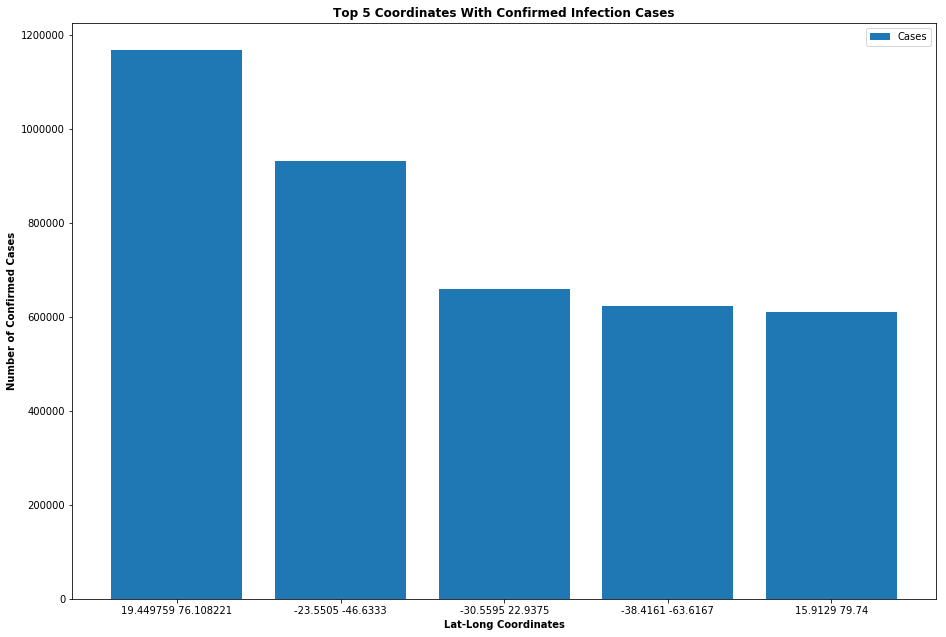

In [57]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Coordinate'], lat_long_df2['Confirmed'].sort_values(ascending=False),label='Cases')
plt.title('Top 5 Coordinates With Confirmed Infection Cases',fontweight='bold')
plt.xlabel('Lat-Long Coordinates',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')
plt.legend(loc='best')
#plt.show()
plt.savefig("../plots/plot10", bbox_inches="tight")

**Plotting Locations With Highest Confirmed Infection Cases (Bar Graph)**

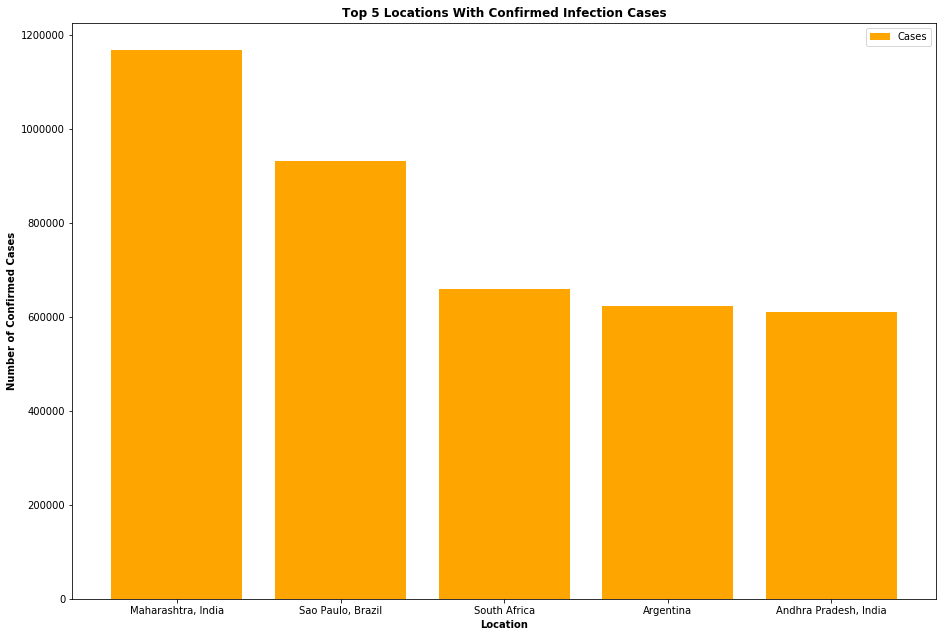

In [58]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Confirmed'].sort_values(ascending=False),label='Cases',color='orange')
plt.title('Top 5 Locations With Confirmed Infection Cases',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot11", bbox_inches="tight")

In [59]:
lat_long_df2

,Lat,Long_,Confirmed,Combined_Key,Active,Recovered,Deaths,Coordinate
253,19.449759,76.108221,1167496,"Maharashtra, India",301273.0,834432,31791,19.449759 76.108221
54,-23.550500,-46.633300,931673,"Sao Paulo, Brazil",117298.0,780448,33927,-23.5505 -46.6333
574,-30.559500,22.937500,659656,South Africa,54282.0,589434,15940,-30.5595 22.9375
6,-38.416100,-63.616700,622934,Argentina,132058.0,478077,12799,-38.4161 -63.6167
234,15.912900,79.740000,609558,"Andhra Pradesh, India",84423.0,519891,5244,15.9129 79.74


**Plotting Locations With Highest Confirmed Infection Cases (Pie Graph)**

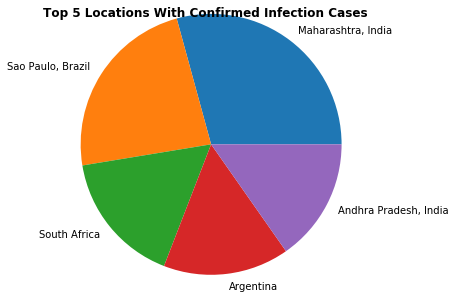

In [60]:
plt.pie(x=lat_long_df2['Confirmed'],labels=['Maharashtra, India','Sao Paulo, Brazil','South Africa','Argentina','Andhra Pradesh, India'],radius=1.5)
plt.suptitle('Top 5 Locations With Confirmed Infection Cases',fontweight='bold')
plt.savefig("../plots/plot12", bbox_inches="tight")

**Plotting Locations With Highest Confirmed Infection Cases (With Active Infection Cases) (Stacked Bar Graph)**

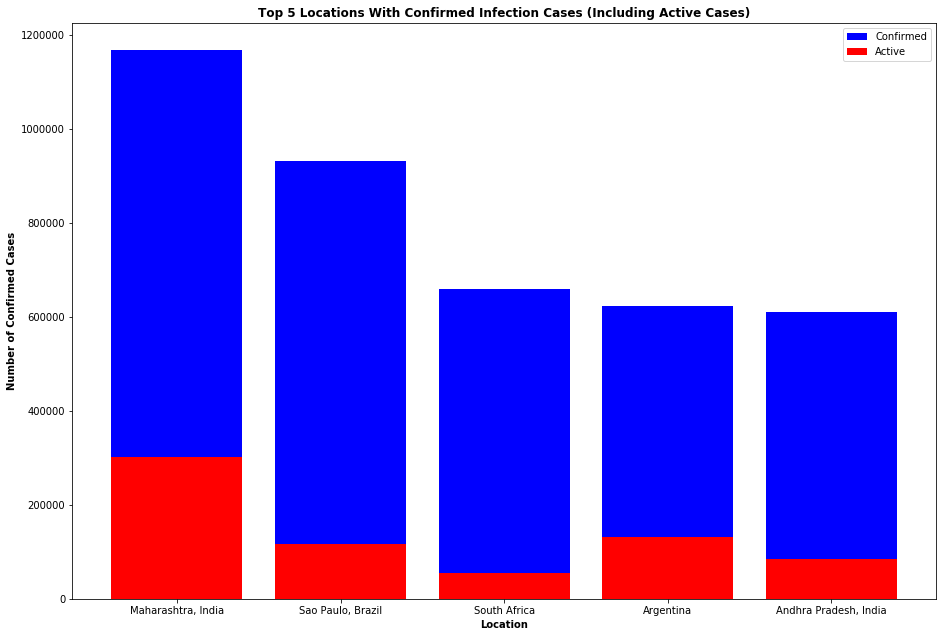

In [61]:
N=5
ind = np.arange(N)
width=0

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Confirmed'],color='b',label='Confirmed',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Active'],color='r',label='Active',align='center')
plt.title('Top 5 Locations With Confirmed Infection Cases (Including Active Cases)',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')

plt.xticks(ind+width/2)
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot13", bbox_inches="tight")

**Plotting Locations With Highest Confirmed Infection Cases (With Active , Recovered and Death Cases) (Stacked Bar Graph)**

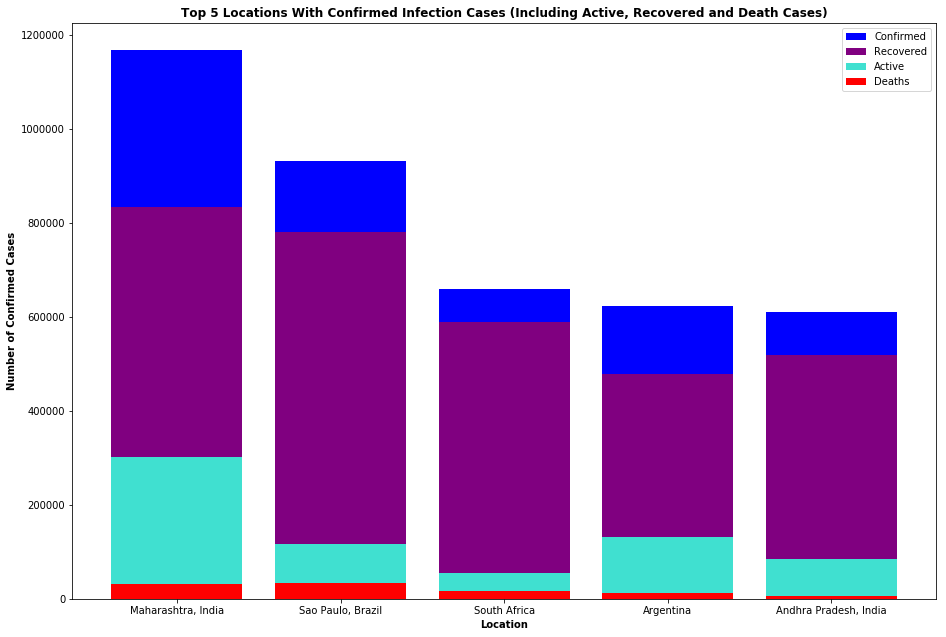

In [62]:
N=5
ind = np.arange(N)
width=0

fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Confirmed'],color='b',label='Confirmed',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Recovered'],color='purple',label='Recovered',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Active'],color='turquoise',label='Active',align='center')
ax.bar(lat_long_df2['Combined_Key'], lat_long_df2['Deaths'],color='r',label='Deaths',align='center')
plt.title('Top 5 Locations With Confirmed Infection Cases (Including Active, Recovered and Death Cases)',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Number of Confirmed Cases',fontweight='bold')

plt.xticks(ind+width/2)
plt.legend(loc='best')
#plt.show() 
plt.savefig("../plots/plot14", bbox_inches="tight")

In [63]:
location_data['Incidence_Rate'].sort_values(ascending=False)

1052    14871.183644
782     14718.980344
991     14604.606982
3277    14595.887983
3239    12414.481186
            ...     
3742             NaN
3796             NaN
3866             NaN
3898             NaN
3943             NaN
Name: Incidence_Rate, Length: 3954, dtype: float64

In [64]:
location_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


In [65]:
inci_df = pd.DataFrame(location_data, columns=['Combined_Key', 'Incidence_Rate'])

cfr_df = pd.DataFrame(location_data, columns=['Combined_Key', 'Case-Fatality_Ratio'])

In [66]:
inci_df['Incidence_Rate'].sort_values(ascending=False)

1052    14871.183644
782     14718.980344
991     14604.606982
3277    14595.887983
3239    12414.481186
            ...     
3742             NaN
3796             NaN
3866             NaN
3898             NaN
3943             NaN
Name: Incidence_Rate, Length: 3954, dtype: float64

In [67]:
cfr_df['Case-Fatality_Ratio'].sort_values(ascending=False)

3063    108.812950
1821     89.473684
740      50.000000
3076     48.441674
3951     28.874630
           ...    
3554           NaN
3697           NaN
3796           NaN
3866           NaN
3943           NaN
Name: Case-Fatality_Ratio, Length: 3954, dtype: float64

In [68]:
plt_values_ir = inci_df['Incidence_Rate']
to_remove_ir = plt_values_ir[plt_values_ir <= 10000]
inci_df = inci_df[~inci_df.Incidence_Rate.isin(to_remove_ir)]

In [69]:
inci_df = inci_df.dropna().sort_values(by=['Incidence_Rate'],ascending=False)
inci_df

,Combined_Key,Incidence_Rate
1052,"Chattahoochee, Georgia, US",14871.183644
782,"Lincoln, Arkansas, US",14718.980344
991,"Lafayette, Florida, US",14604.606982
3277,"Trousdale, Tennessee, US",14595.887983
3239,"Lake, Tennessee, US",12414.481186
781,"Lee, Arkansas, US",11787.286892
2341,"Dakota, Nebraska, US",10686.108060


**Plotting Locations with Incidence Rates > 10000 (Bar Graph)**

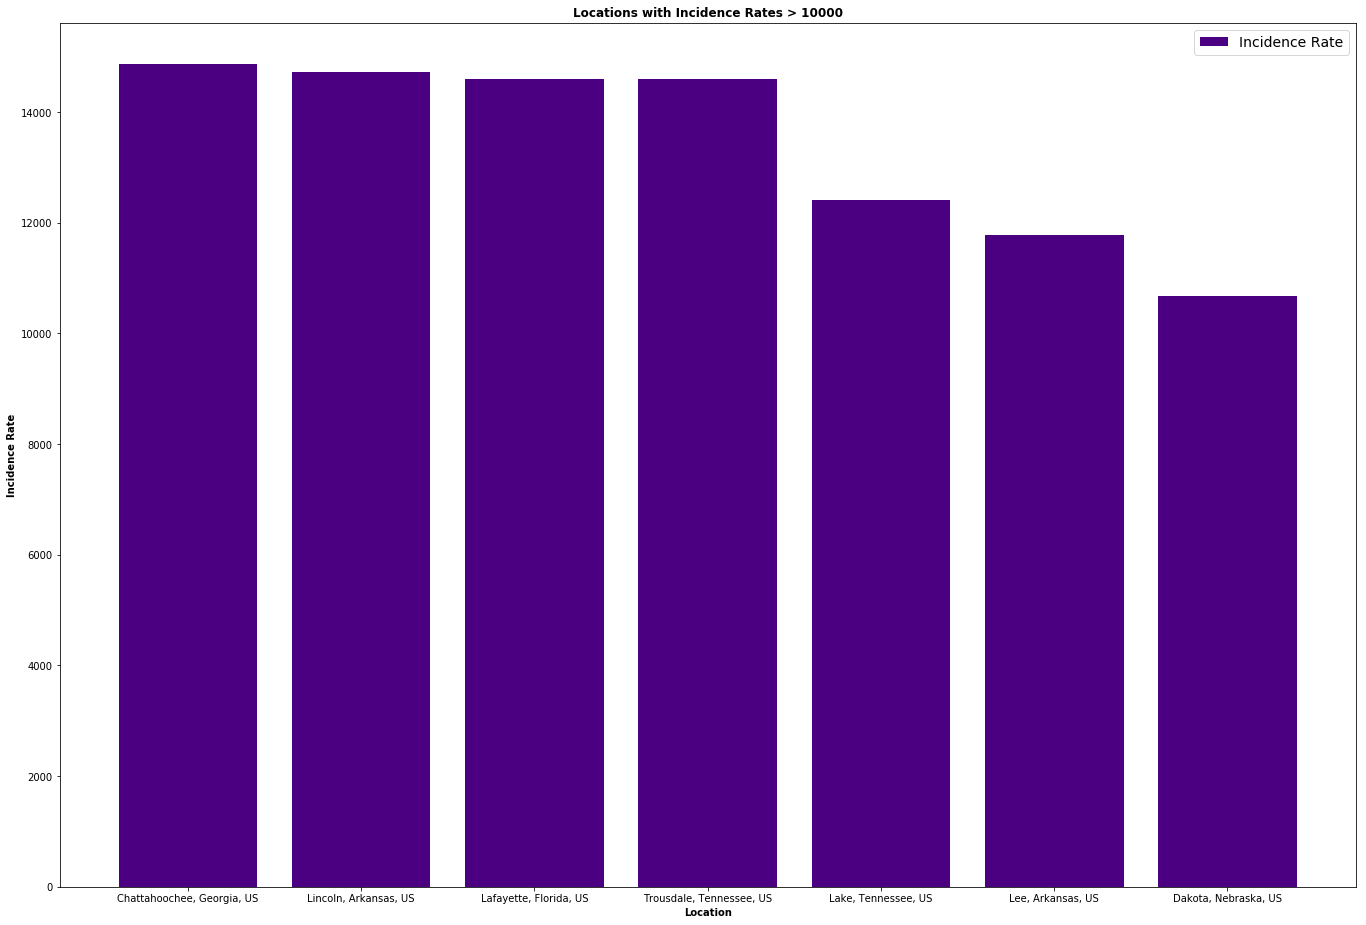

In [70]:
fig = plt.figure()
ax = fig.add_axes([0,0,3,3])
ax.bar(inci_df['Combined_Key'], inci_df['Incidence_Rate'].dropna(),label='Incidence Rate',color='Indigo')
plt.title('Locations with Incidence Rates > 10000',fontweight='bold')
plt.xlabel('Location',fontweight='bold')
plt.ylabel('Incidence Rate',fontweight='bold')
plt.legend(loc='best',fontsize=14)
#plt.show() 
plt.savefig("../plots/plot15", bbox_inches="tight")

In [71]:
cfr_df['Case_Fatality_Ratio'] = cfr_df['Case-Fatality_Ratio']
cfr_df

,Combined_Key,Case-Fatality_Ratio,Case_Fatality_Ratio
0,Afghanistan,3.692284,3.692284
1,Albania,2.928186,2.928186
2,Algeria,3.355299,3.355299
3,Andorra,3.388747,3.388747
4,Angola,3.768265,3.768265
...,...,...,...
3949,West Bank and Gaza,0.722795,0.722795
3950,Western Sahara,10.000000,10.000000
3951,Yemen,28.874630,28.874630
3952,Zambia,2.345416,2.345416


In [72]:
plt_values_cfr = cfr_df['Case_Fatality_Ratio']
to_remove_cfr = plt_values_cfr[plt_values_cfr <= 19]
cfr_df = cfr_df[~cfr_df.Case_Fatality_Ratio.isin(to_remove_cfr)]

In [73]:
cfr_df = cfr_df.dropna().sort_values(by=['Case_Fatality_Ratio'],ascending=False)
cfr_df

,Combined_Key,Case-Fatality_Ratio,Case_Fatality_Ratio
3063,"Unassigned, Puerto Rico, US",108.812950,108.812950
1821,"Unassigned, Louisiana, US",89.473684,89.473684
740,"Unassigned, Arizona, US",50.000000,50.000000
3076,"Unassigned, Rhode Island, US",48.441674,48.441674
3951,Yemen,28.874630,28.874630
3512,"Throckmorton, Texas, US",28.571429,28.571429
2053,"Unassigned, Minnesota, US",27.807487,27.807487
2387,"Perkins, Nebraska, US",27.272727,27.272727
362,MS Zaandam,22.222222,22.222222
1846,"Waldo, Maine, US",19.178082,19.178082


**Plotting Locations with Highest Case Fatality Rates (Bar Graph)**

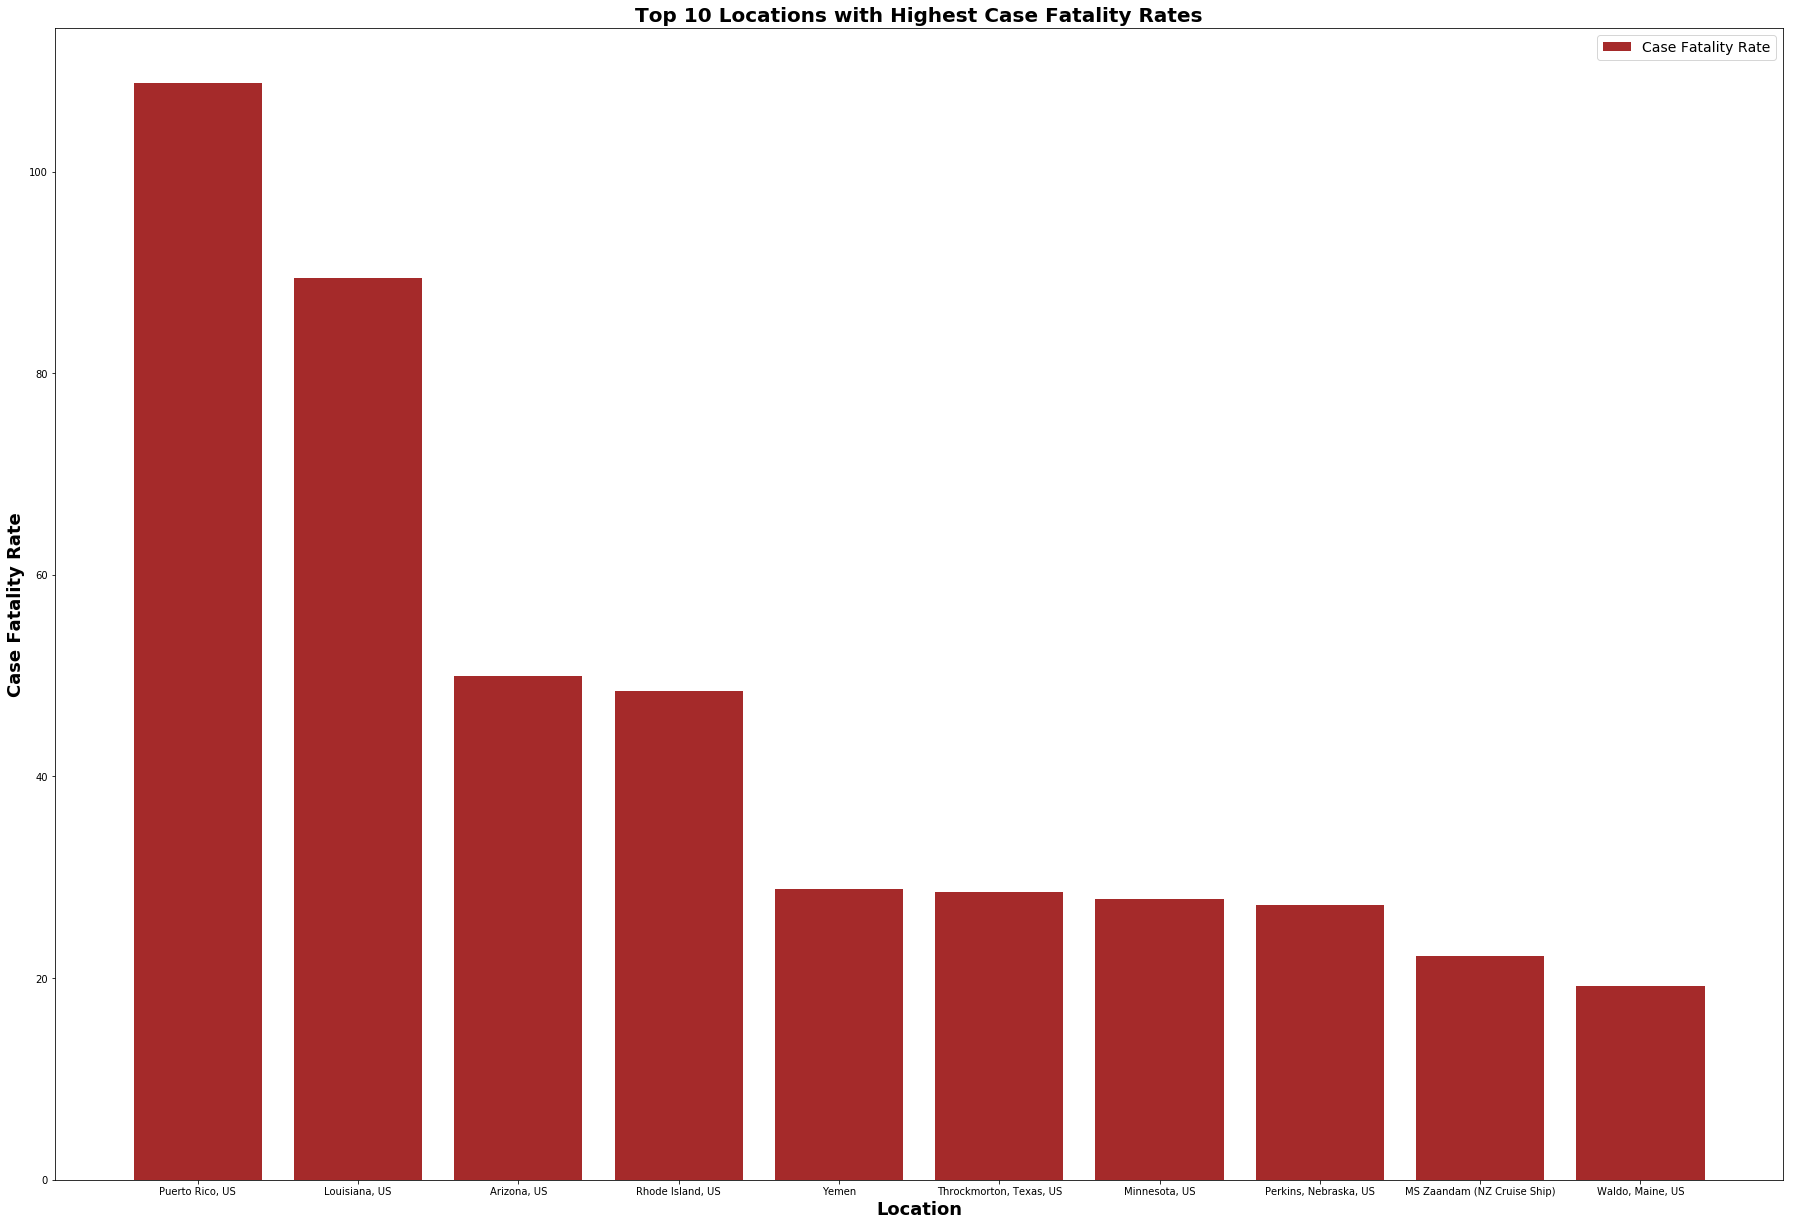

In [74]:
N=10
ind = np.arange(N)
width=0

fig = plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(cfr_df['Combined_Key'], cfr_df['Case_Fatality_Ratio'].dropna(),label='Case Fatality Rate',color='brown')
plt.title('Top 10 Locations with Highest Case Fatality Rates',fontweight='bold', fontsize=20)
plt.xlabel('Location',fontweight='bold', fontsize=18)
plt.ylabel('Case Fatality Rate',fontweight='bold',fontsize=18)

plt.xticks(ind+width/2, ['Puerto Rico, US', 'Louisiana, US', 'Arizona, US', 'Rhode Island, US', 'Yemen', 'Throckmorton, Texas, US', 'Minnesota, US', 'Perkins, Nebraska, US', 'MS Zaandam (NZ Cruise Ship)', 'Waldo, Maine, US'])

plt.legend(loc='best',fontsize=14)
#plt.show() 
plt.savefig("../plots/plot16", bbox_inches="tight")

## Number of Missing Values in Test Data

In [75]:
num_na = train_data.isna().sum()
total = len(train_data)
print("Number of missing Values: ", num_na)
print("Percentage of missing values: ", round(num_na/total, 2))
print("")

print("Test data additional stats:")
print("Number of unique latitude values: ", test_data['latitude'].nunique())
print("Number of unique longitude values: ", test_data['longitude'].nunique())
print("Number of unique province values: ", test_data['province'].nunique())
print("Number of unique country values: ", test_data['country'].nunique())
print("")

print("Train data additional stats:")
print("Number of unique latitude values: ", train_data['latitude'].nunique())
print("Number of unique longitude values: ", train_data['longitude'].nunique())
print("Number of unique province values: ", train_data['province'].nunique())
print("Number of unique country values: ", train_data['country'].nunique())

Number of missing Values:  age                       209265
sex                       207084
province                    4106
country                       18
latitude                       2
longitude                      2
date_confirmation            288
additional_information    344912
source                    128478
outcome                        0
dtype: int64
Percentage of missing values:  age                       0.57
sex                       0.56
province                  0.01
country                   0.00
latitude                  0.00
longitude                 0.00
date_confirmation         0.00
additional_information    0.94
source                    0.35
outcome                   0.00
dtype: float64

Test data additional stats:
Number of unique latitude values:  3458
Number of unique longitude values:  3456
Number of unique province values:  749
Number of unique country values:  102

Train data additional stats:
Number of unique latitude values:  7297
Number of unique 

In [76]:
train_data['sex'].value_counts()

male      88635
female    71917
Name: sex, dtype: int64

In [77]:
train_data['age'].isnull().sum()

209265